<a href="https://colab.research.google.com/github/Anamika2101/Mall_Customer/blob/main/Mall_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

pandas version: 2.2.2
numpy version: 1.26.4
seaborn version: 0.13.2


In [2]:
mall_data = pd.read_csv('Mall_Customers.csv')

print('There are {} rows and {} columns in our dataset.'.format(mall_data.shape[0],mall_data.shape[1]))

There are 200 rows and 5 columns in our dataset.


In [3]:
mall_data.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
92,93,Male,48,60,49
77,78,Male,40,54,48
56,57,Female,51,44,50
6,7,Female,35,18,6
61,62,Male,19,46,55
141,142,Male,32,75,93
99,100,Male,20,61,49
123,124,Male,39,69,91
8,9,Male,64,19,3
121,122,Female,38,67,40


In [4]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
mall_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [6]:
males_age = mall_data[mall_data['Gender']=='Male']['Age'] # subset with males age
females_age = mall_data[mall_data['Gender']=='Female']['Age'] # subset with females age


In [7]:
age_bins = range(15,75,5)

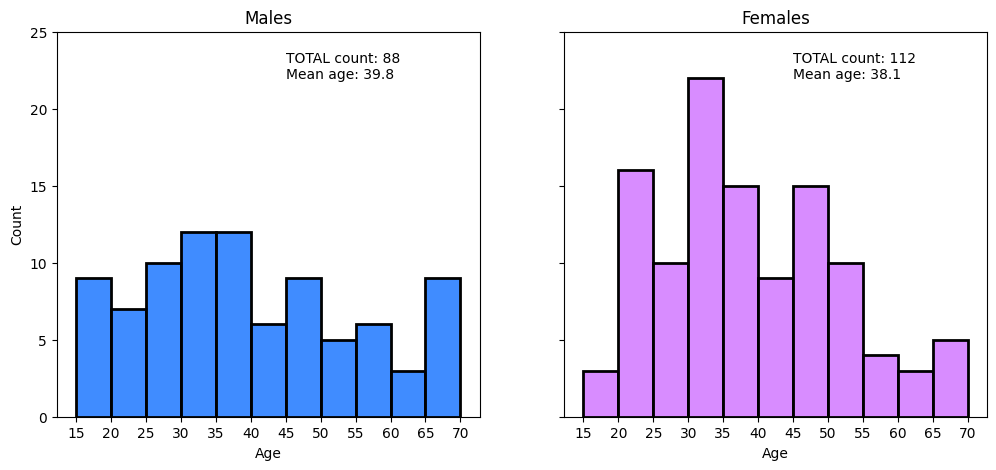

In [8]:
# males histogram
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.histplot(males_age, bins=age_bins, color='#0066ff', ax=ax1, edgecolor="k", linewidth=2)
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45,23, "TOTAL count: {}".format(males_age.count()))
ax1.text(45,22, "Mean age: {:.1f}".format(males_age.mean()))

# females histogram
sns.histplot(females_age, bins=age_bins, color='#cc66ff', ax=ax2, edgecolor="k", linewidth=2)
ax2.set_xticks(age_bins)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45,23, "TOTAL count: {}".format(females_age.count()))
ax2.text(45,22, "Mean age: {:.1f}".format(females_age.mean()))

plt.show()


In [9]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_age, females_age)[1]))

Kolgomorov-Smirnov test p-value: 0.49


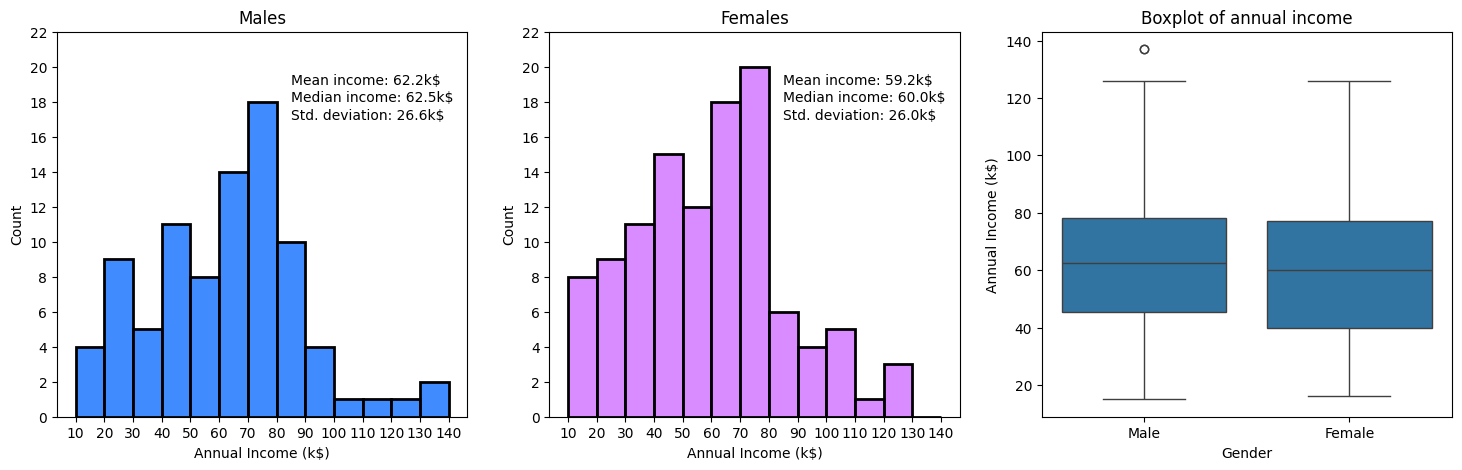

In [10]:
# Define bins and subset the data by gender
males_income = mall_data[mall_data['Gender']=='Male']['Annual Income (k$)']
females_income = mall_data[mall_data['Gender']=='Female']['Annual Income (k$)']
my_bins = range(10, 150, 10)

# Set up the subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Males income histogram
sns.histplot(males_income, bins=my_bins, color='#0066ff', ax=ax1, edgecolor="k", linewidth=2)
ax1.set_xticks(my_bins)
ax1.set_yticks(range(0, 24, 2))
ax1.set_ylim(0, 22)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(85, 19, "Mean income: {:.1f}k$".format(males_income.mean()))
ax1.text(85, 18, "Median income: {:.1f}k$".format(males_income.median()))
ax1.text(85, 17, "Std. deviation: {:.1f}k$".format(males_income.std()))

# Females income histogram
sns.histplot(females_income, bins=my_bins, color='#cc66ff', ax=ax2, edgecolor="k", linewidth=2)
ax2.set_xticks(my_bins)
ax2.set_yticks(range(0, 24, 2))
ax2.set_ylim(0, 22)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(85, 19, "Mean income: {:.1f}k$".format(females_income.mean()))
ax2.text(85, 18, "Median income: {:.1f}k$".format(females_income.median()))
ax2.text(85, 17, "Std. deviation: {:.1f}k$".format(females_income.std()))

# Boxplot for annual income by gender
sns.boxplot(x='Gender', y='Annual Income (k$)', data=mall_data, ax=ax3)
ax3.set_title('Boxplot of annual income')

plt.show()


In [11]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_income, females_income)[1]))

Kolgomorov-Smirnov test p-value: 0.78


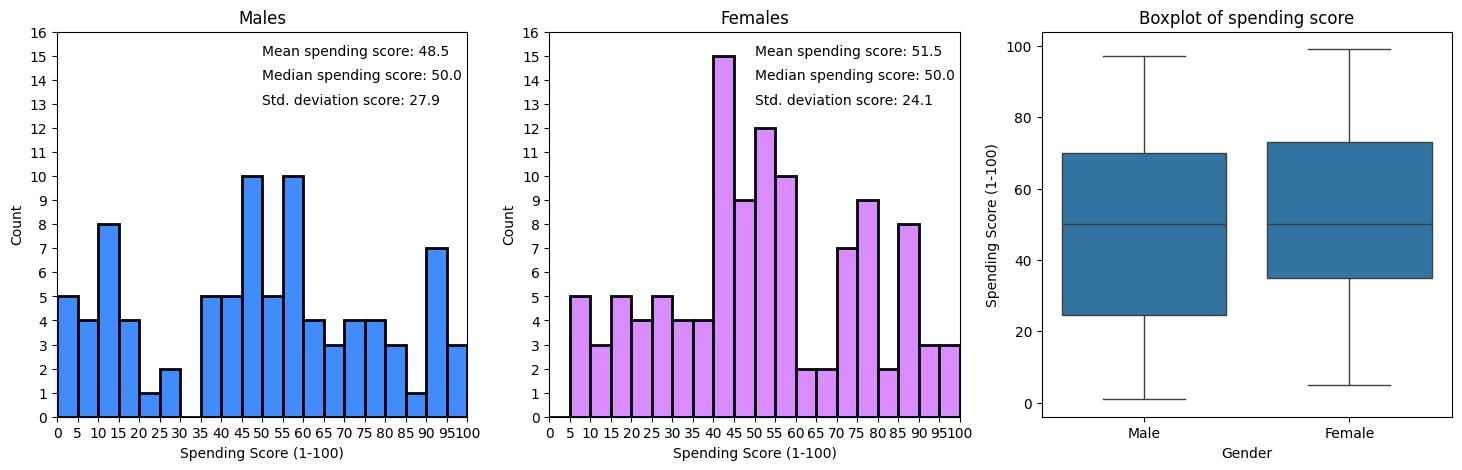

In [12]:
# Subset the data by gender
males_spending = mall_data[mall_data['Gender']=='Male']['Spending Score (1-100)']
females_spending = mall_data[mall_data['Gender']=='Female']['Spending Score (1-100)']
spending_bins = range(0, 105, 5)

# Set up the subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Males spending score histogram
sns.histplot(males_spending, bins=spending_bins, color='#0066ff', ax=ax1, edgecolor="k", linewidth=2)
ax1.set_xticks(spending_bins)
ax1.set_xlim(0, 100)
ax1.set_yticks(range(0, 17, 1))
ax1.set_ylim(0, 16)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(50, 15, "Mean spending score: {:.1f}".format(males_spending.mean()))
ax1.text(50, 14, "Median spending score: {:.1f}".format(males_spending.median()))
ax1.text(50, 13, "Std. deviation score: {:.1f}".format(males_spending.std()))

# Females spending score histogram
sns.histplot(females_spending, bins=spending_bins, color='#cc66ff', ax=ax2, edgecolor="k", linewidth=2)
ax2.set_xticks(spending_bins)
ax2.set_xlim(0, 100)
ax2.set_yticks(range(0, 17, 1))
ax2.set_ylim(0, 16)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(50, 15, "Mean spending score: {:.1f}".format(females_spending.mean()))
ax2.text(50, 14, "Median spending score: {:.1f}".format(females_spending.median()))
ax2.text(50, 13, "Std. deviation score: {:.1f}".format(females_spending.std()))

# Boxplot for spending score by gender
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=mall_data, ax=ax3)
ax3.set_title('Boxplot of spending score')

plt.show()


In [13]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_spending, females_spending)[1]))

Kolgomorov-Smirnov test p-value: 0.29


In [14]:
medians_by_age_group = mall_data.groupby(["Gender",pd.cut(mall_data['Age'], age_bins)]).median()
medians_by_age_group.index = medians_by_age_group.index.set_names(['Gender', 'Age_group'])
medians_by_age_group.reset_index(inplace=True)

<ipython-input-14-982f56797b65>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians_by_age_group = mall_data.groupby(["Gender",pd.cut(mall_data['Age'], age_bins)]).median()


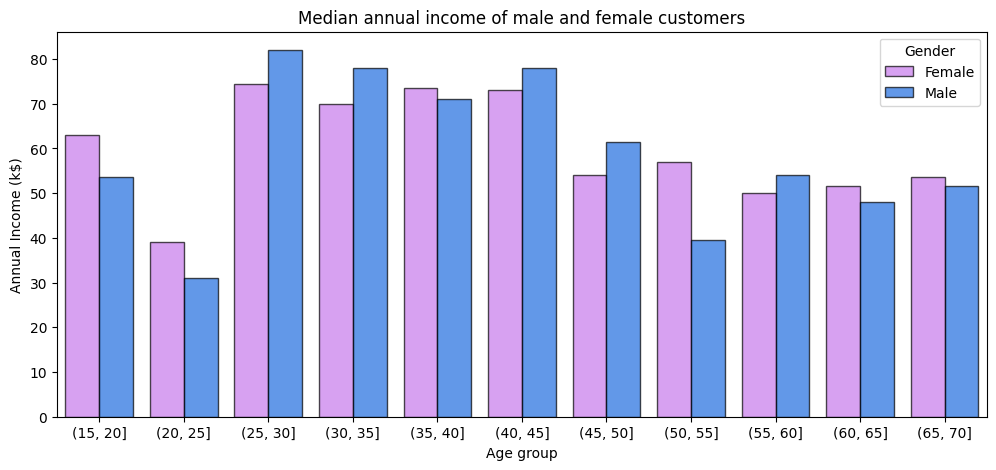

In [15]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x='Age_group', y='Annual Income (k$)', hue='Gender', data=medians_by_age_group,
            palette=['#cc66ff','#0066ff'],
            alpha=0.7,edgecolor='k',
            ax=ax)
ax.set_title('Median annual income of male and female customers')
ax.set_xlabel('Age group')
plt.show()

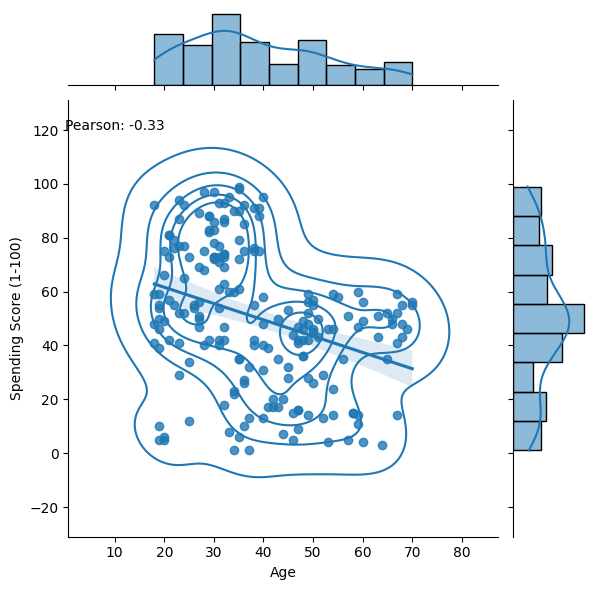

In [16]:
from scipy.stats import pearsonr

# Calculate Pearson's correlation
corr, _ = pearsonr(mall_data['Age'], mall_data['Spending Score (1-100)'])

# Create the joint plot with proper syntax
jp = sns.jointplot(x='Age', y='Spending Score (1-100)', data=mall_data, kind='reg')
jp.plot_joint(sns.kdeplot, zorder=0, n_levels=6)

# Add the Pearson correlation as text
plt.text(0, 120, 'Pearson: {:.2f}'.format(corr))
plt.show()


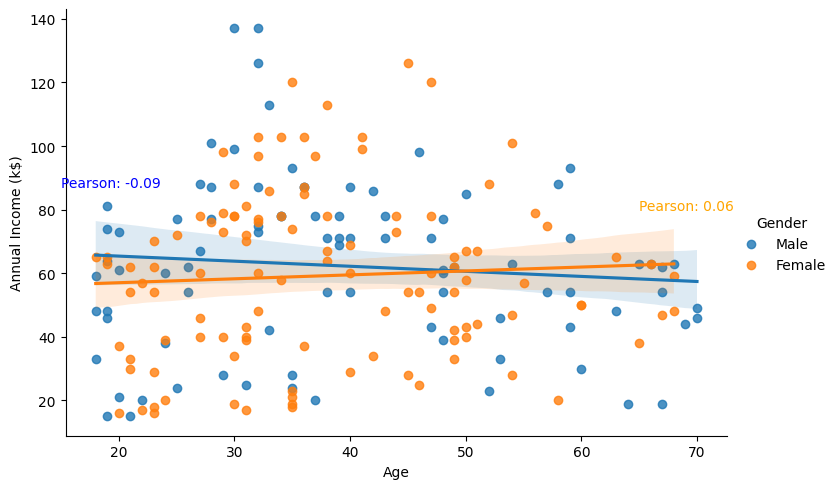

In [17]:
from scipy.stats import pearsonr

# Calculating Pearson's correlations
corr1, _ = pearsonr(males_age.values, males_income.values)
corr2, _ = pearsonr(females_age.values, females_income.values)

# Plotting with `x` and `y` as keyword arguments
sns.lmplot(x='Age', y='Annual Income (k$)', data=mall_data, hue='Gender', aspect=1.5)

# Adding text annotations for Pearson correlation
plt.text(15, 87, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(65, 80, 'Pearson: {:.2f}'.format(corr2), color='orange')

plt.show()


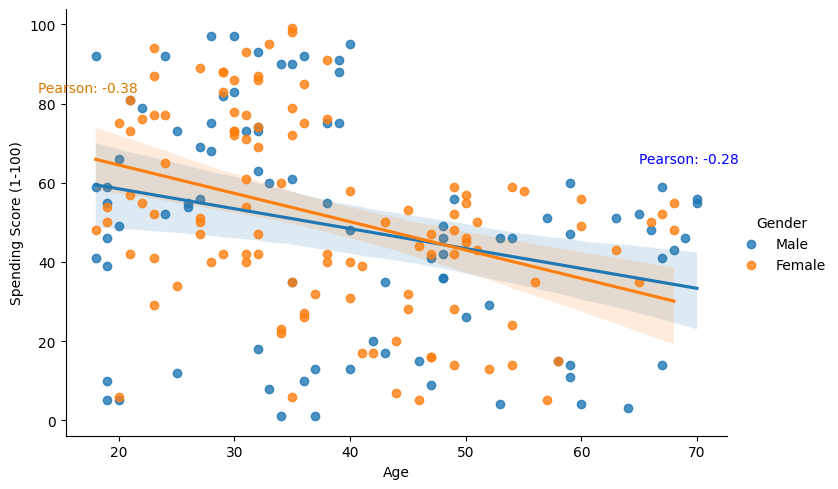

In [18]:
from scipy.stats import pearsonr

# Calculating Pearson's correlations
corr1, _ = pearsonr(males_age.values, males_spending.values)
corr2, _ = pearsonr(females_age.values, females_spending.values)

# Plotting with `x` and `y` as keyword arguments
sns.lmplot(x='Age', y='Spending Score (1-100)', data=mall_data, hue='Gender', aspect=1.5)

# Adding text annotations for Pearson correlation
plt.text(65, 65, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(13, 83, 'Pearson: {:.2f}'.format(corr2), color='#d97900')

plt.show()


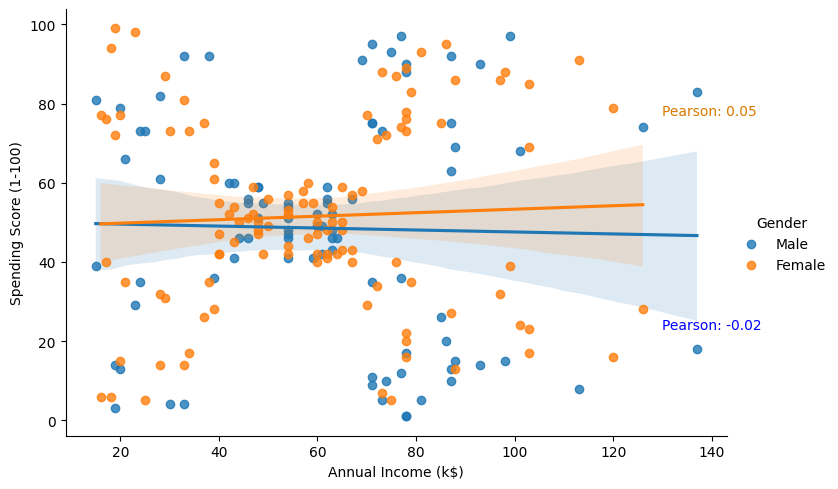

In [19]:
# calculating Pearson's correlations
corr1, _ = pearsonr(males_income.values, males_spending.values)
corr2, _ = pearsonr(females_income.values, females_spending.values)

sns.lmplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=mall_data, hue='Gender',
          aspect=1.5)

plt.text(130,23, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(130,77, 'Pearson: {:.2f}'.format(corr2), color='#d97900')

plt.show()

In [20]:
from sklearn.cluster import KMeans

In [21]:
X_numerics = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] # subset with numeric variables only

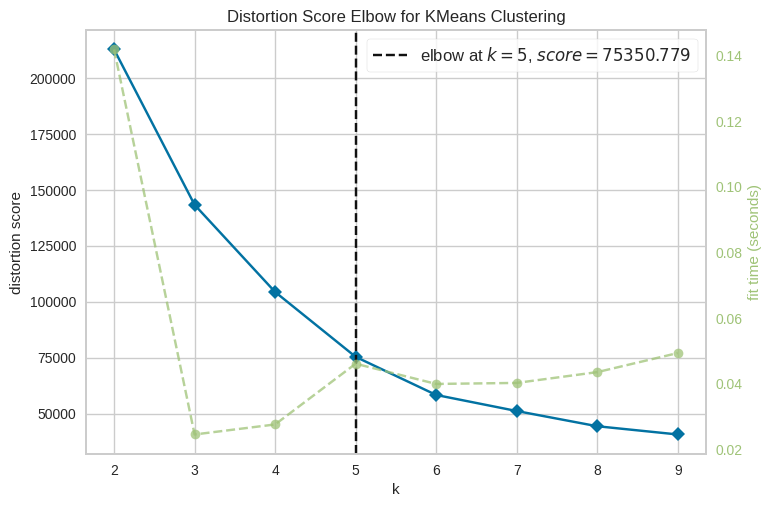

In [22]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans(n_init=10, random_state=1)  # Explicitly set n_init
visualizer = KElbowVisualizer(model, k=(2, 10))

visualizer.fit(X_numerics)
visualizer.show()
plt.show()


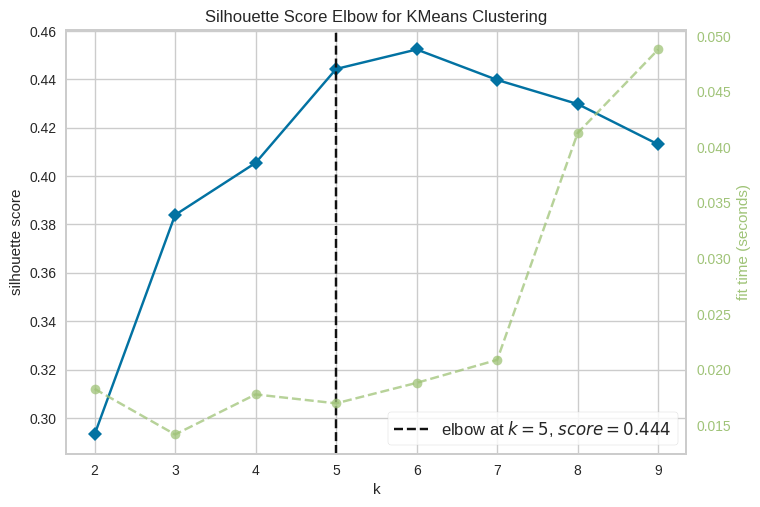

In [23]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Set n_init explicitly to suppress the FutureWarning
model = KMeans(n_init=10, random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 10), metric='silhouette')

visualizer.fit(X_numerics)
visualizer.show()
plt.show()


In [24]:
from sklearn.cluster import KMeans

# Set n_init explicitly to suppress the warning
KM_5_clusters = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=1).fit(X_numerics)

KM5_clustered = X_numerics.copy()
KM5_clustered['Cluster'] = KM_5_clusters.labels_  # Append labels to points


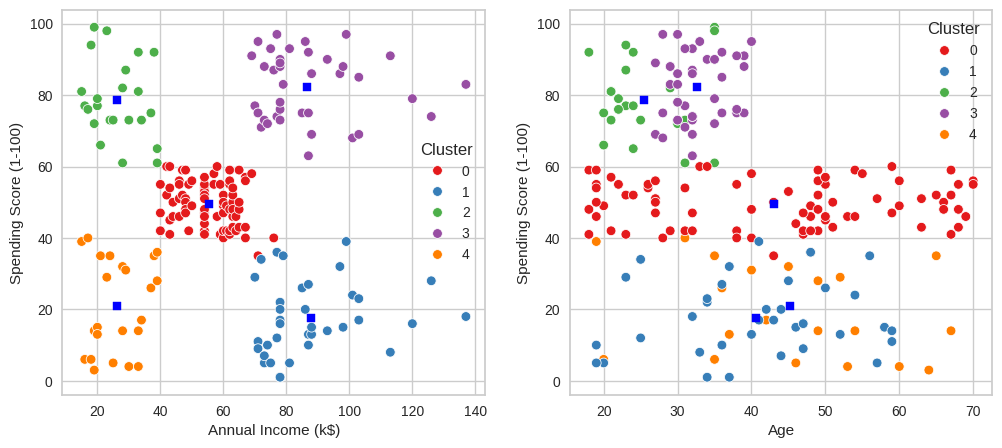

In [25]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)', data=KM5_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

In [26]:
KM_clust_sizes = KM5_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

,KM_size
Cluster,
0,79
1,36
2,23
3,39
4,23


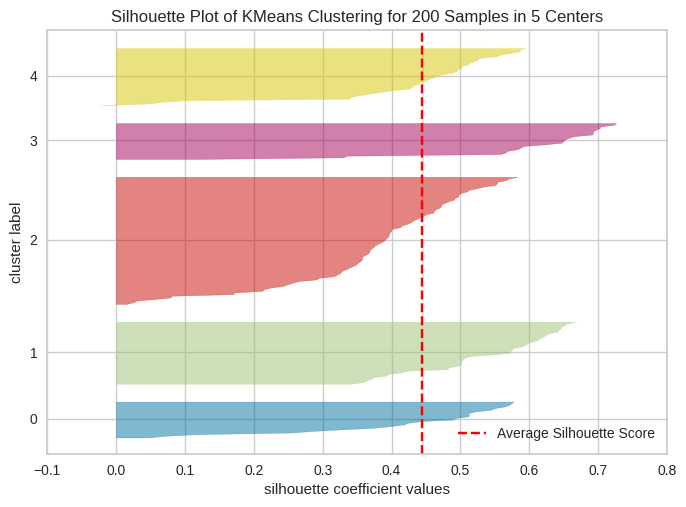

In [27]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt

# Set n_init explicitly to avoid the warning
model = KMeans(n_clusters=5, random_state=0, n_init=10)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X_numerics)
visualizer.show()
plt.show()


In [28]:
from sklearn.cluster import KMeans

# Set n_init explicitly to suppress the warning
KM_6_clusters = KMeans(n_clusters=6, init='k-means++', n_init=10).fit(X_numerics)

KM6_clustered = X_numerics.copy()
KM6_clustered['Cluster'] = KM_6_clusters.labels_  # Append labels to points


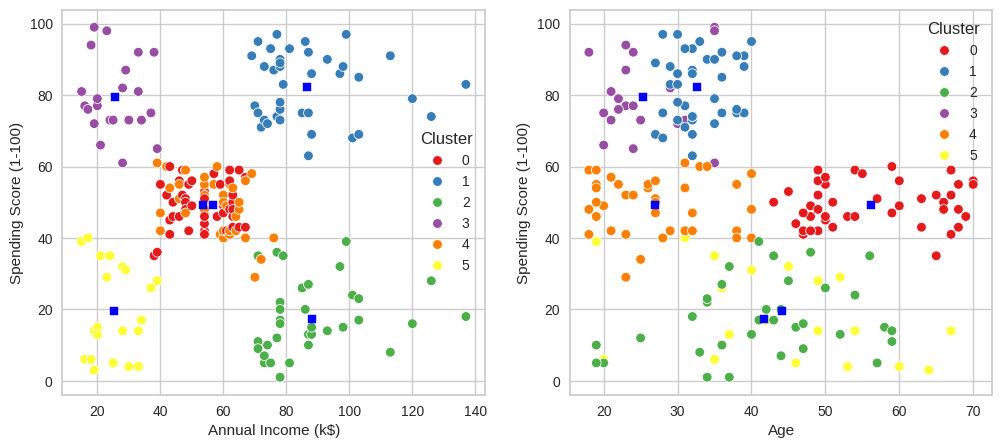

In [29]:
fig11, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=KM6_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot(x='Age',y='Spending Score (1-100)', data=KM6_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

# plotting centroids
axes[0].scatter(KM_6_clusters.cluster_centers_[:,1], KM_6_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_6_clusters.cluster_centers_[:,0], KM_6_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

In [30]:
KM6_clust_sizes = KM6_clustered.groupby('Cluster').size().to_frame()
KM6_clust_sizes.columns = ["KM_size"]
KM6_clust_sizes

,KM_size
Cluster,
0,45
1,39
2,35
3,22
4,38
5,21


In [31]:
import plotly.graph_objs as go

# Define the tracer function to create traces for each cluster
def tracer(df, cluster_num, cluster_name):
    cluster_data = df[df['Cluster'] == cluster_num]
    return go.Scatter3d(
        x=cluster_data['Age'],
        y=cluster_data['Spending Score (1-100)'],
        z=cluster_data['Annual Income (k$)'],
        mode='markers',
        name=cluster_name,
        marker=dict(size=5)
    )

# Now you can use the tracer function to create traces for each cluster
trace0 = tracer(KM6_clustered, 0, 'Cluster 0')
trace1 = tracer(KM6_clustered, 1, 'Cluster 1')
trace2 = tracer(KM6_clustered, 2, 'Cluster 2')
trace3 = tracer(KM6_clustered, 3, 'Cluster 3')
trace4 = tracer(KM6_clustered, 4, 'Cluster 4')
trace5 = tracer(KM6_clustered, 5, 'Cluster 5')

data = [trace0, trace1, trace2, trace3, trace4, trace5]

layout = go.Layout(
    title='Clusters by K-Means',
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Spending Score (1-100)'),
        zaxis=dict(title='Annual Income (k$)')
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()


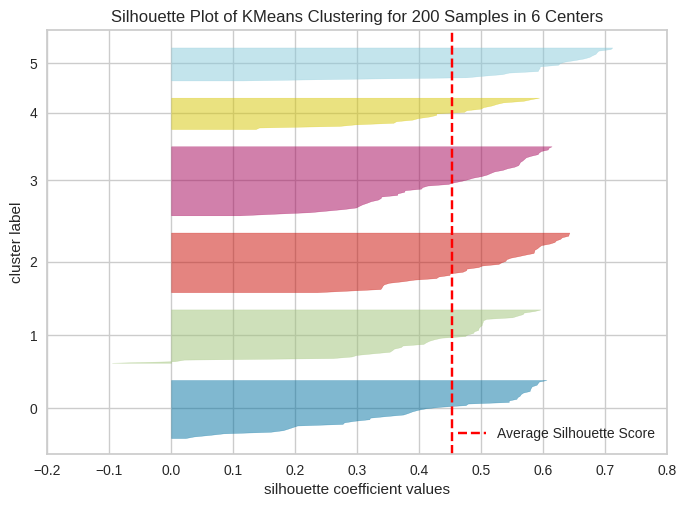

In [32]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

# Set n_init explicitly to suppress the warning
model = KMeans(n_clusters=6, n_init=10, random_state=0)  # or n_init='auto'
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_numerics)
visualizer.show()
plt.show()


In [33]:
from sklearn.cluster import DBSCAN

In [34]:
from itertools import product

eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))

In [35]:
from sklearn.metrics import silhouette_score

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numerics)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_numerics, DBS_clustering.labels_))

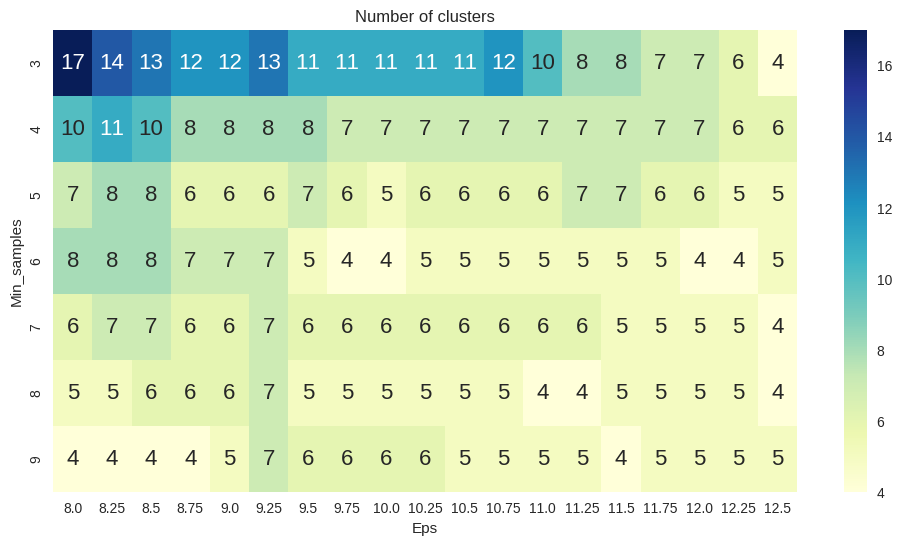

In [36]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

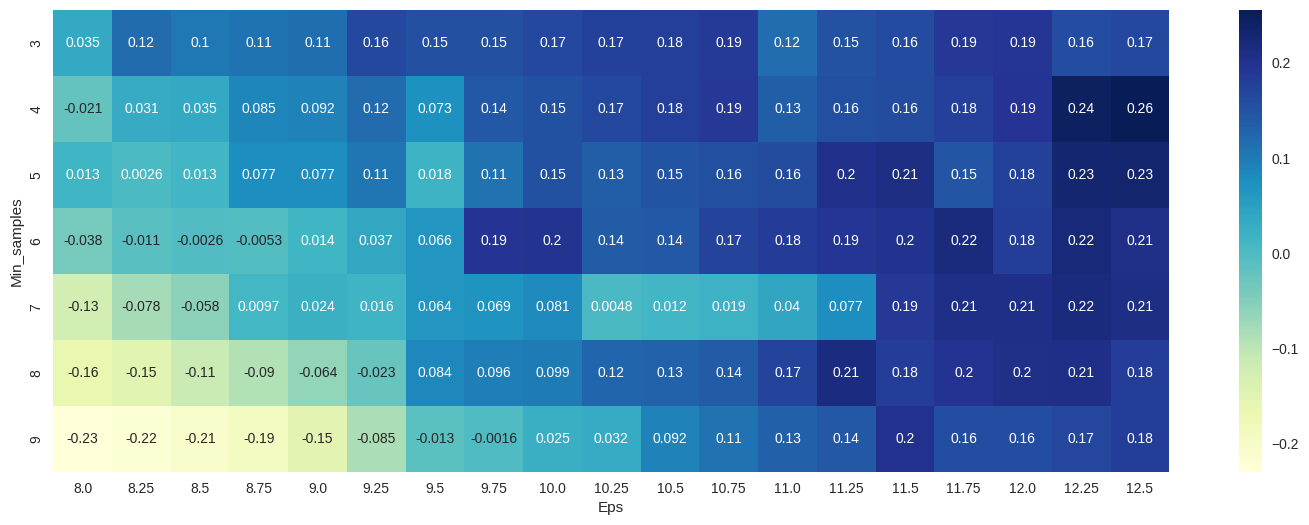

In [37]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [38]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_numerics)

DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [39]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


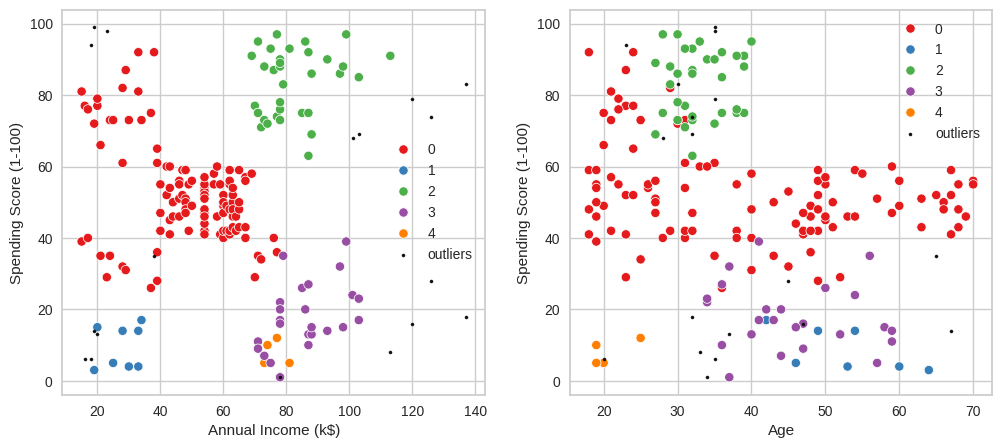

In [40]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))


sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot(x='Age', y='Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

In [41]:
from sklearn.cluster import AffinityPropagation

In [42]:
no_of_clusters = []
preferences = range(-20000, -5000, 100)  # Arbitrary range
af_sil_score = []  # Silhouette scores

for p in preferences:
    AF = AffinityPropagation(preference=p, max_iter=500, damping=0.9).fit(X_numerics)
    no_of_clusters.append(len(np.unique(AF.labels_)))
    af_sil_score.append(silhouette_score(X_numerics, AF.labels_))

af_results = pd.DataFrame([preferences, no_of_clusters, af_sil_score], index=['preference', 'clusters', 'sil_score']).T
af_results.sort_values(by='sil_score', ascending=False).head()  # Display only top 5 scores


,preference,clusters,sil_score
75,-12500.0,6.0,0.45144
70,-13000.0,6.0,0.45144
78,-12200.0,6.0,0.45144
77,-12300.0,6.0,0.45144
76,-12400.0,6.0,0.45144


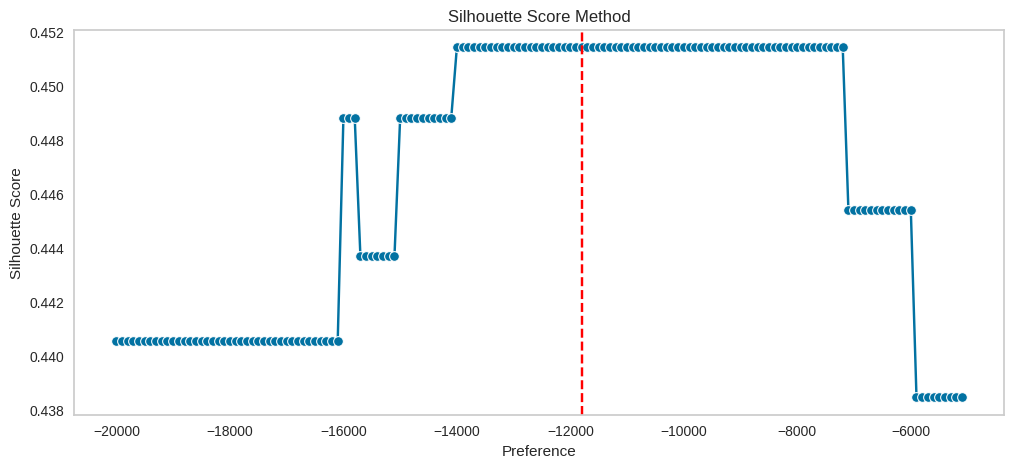

In [43]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=preferences, y=af_sil_score, marker='o', ax=ax)
ax.set_title("Silhouette Score Method")
ax.set_xlabel("Preference")
ax.set_ylabel("Silhouette Score")
ax.axvline(-11800, ls="--", c="red")
plt.grid()
plt.show()


In [44]:
AF = AffinityPropagation(preference=-11800).fit(X_numerics)

In [45]:
AF_clustered = X_numerics.copy()
AF_clustered.loc[:,'Cluster'] = AF.labels_ # append labels to points

In [46]:
AF_clust_sizes = AF_clustered.groupby('Cluster').size().to_frame()
AF_clust_sizes.columns = ["AF_size"]
AF_clust_sizes

,AF_size
Cluster,
0,22
1,22
2,44
3,39
4,34
5,39


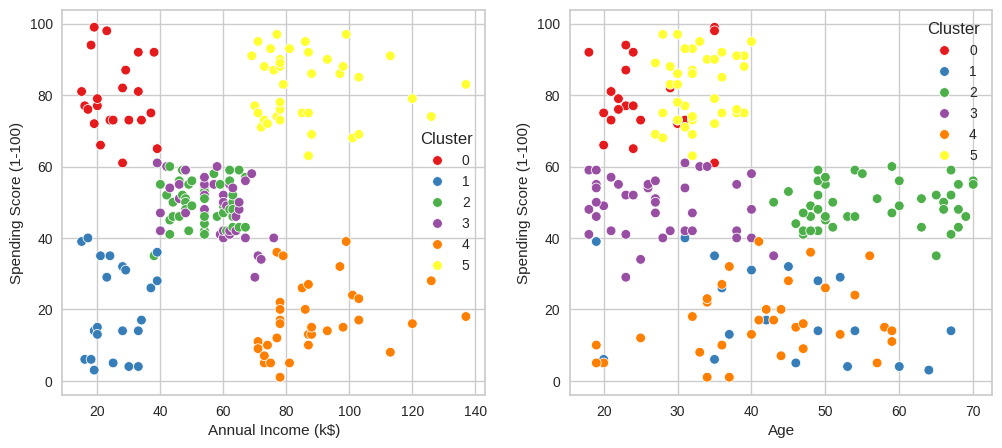

In [47]:
fig3, (ax_af) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)', data=AF_clustered,
                hue='Cluster', ax=ax_af[0], palette='Set1', legend='full')

sns.scatterplot(x='Age',y='Spending Score (1-100)', data=AF_clustered,
                hue='Cluster', palette='Set1', ax=ax_af[1], legend='full')

plt.setp(ax_af[0].get_legend().get_texts(), fontsize='10')
plt.setp(ax_af[1].get_legend().get_texts(), fontsize='10')
plt.show()

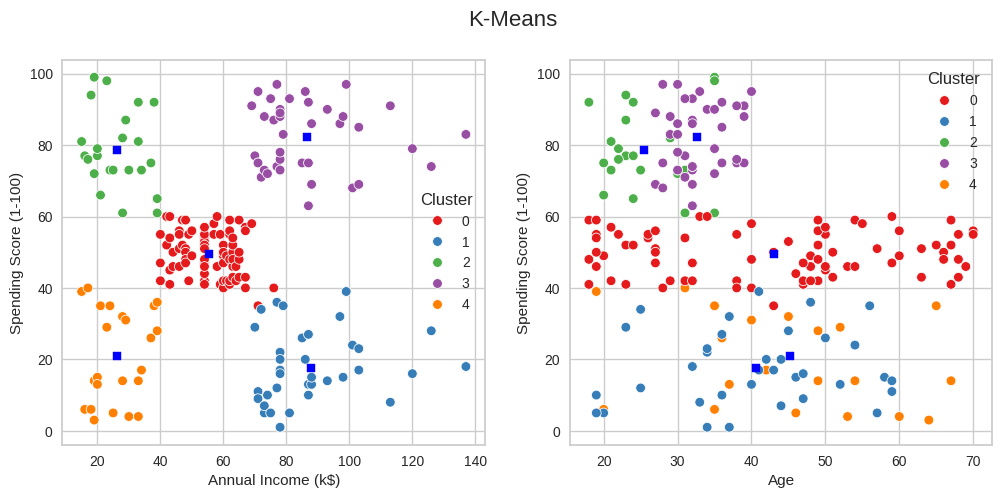

In [48]:
fig1.suptitle('K-Means', fontsize=16)
fig1

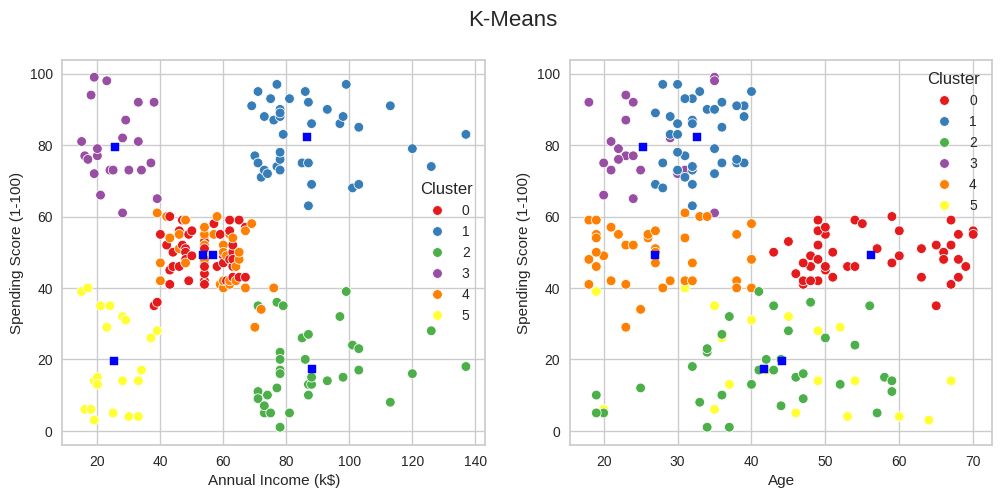

In [49]:
fig11.suptitle('K-Means', fontsize=16)
fig11

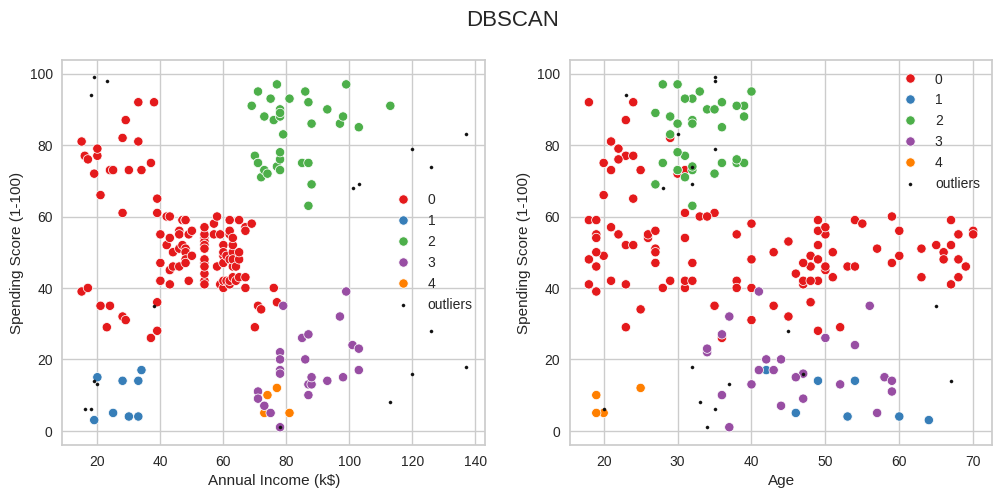

In [50]:
fig2.suptitle('DBSCAN', fontsize=16)
fig2

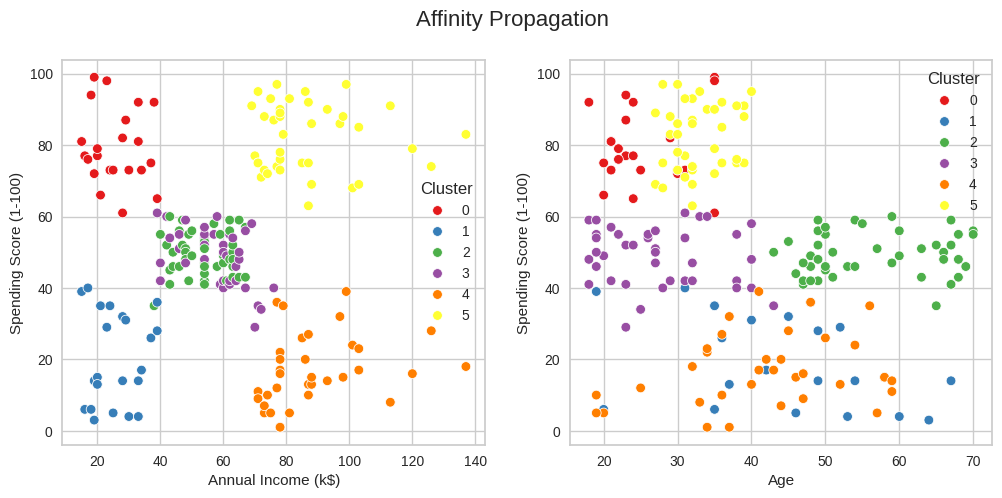

In [51]:
fig3.suptitle('Affinity Propagation', fontsize=16)
fig3

In [52]:
clusters = pd.concat([KM6_clust_sizes, DBSCAN_clust_sizes, AF_clust_sizes],axis=1, sort=False)
clusters


,KM_size,DBSCAN_size,AF_size
Cluster,,,
0,45.0,112.0,22.0
1,39.0,8.0,22.0
2,35.0,34.0,44.0
3,22.0,24.0,39.0
4,38.0,4.0,34.0
5,21.0,NaN,39.0
-1,NaN,18.0,NaN
